# PINNs

Inspired from https://maziarraissi.github.io/PINNs/

## Burgers' Equation

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

import numpy as np

import jax
import jax.random as jr
import jax.numpy as jnp

import flax.linen as nn
import optax

import matplotlib.pyplot as plt


from pyDOE import lhs

RuntimeError: jaxlib is version 0.3.25, but this version of jax requires version >= 0.4.2.

In [ ]:
%pip install -U 

Generate the data-points

(100, 1) (100, 1) (100, 1)


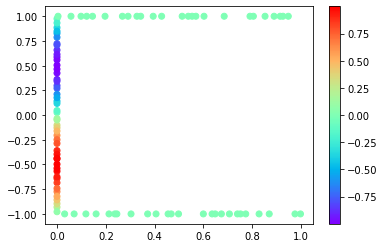

In [63]:
np.random.seed(0)

# Initial data (t=0, x in [-1, 1])
t = jnp.zeros((50, 1))
x = lhs(1, 50) * 2 - 1
u = -jnp.sin(jnp.pi * x)
train_x = x
train_t = t
train_u = u

# Boundary data (x=[1, -1], t in [0, 1])
t = lhs(1, 50)
x = jnp.concatenate([jnp.ones((25, 1)), -jnp.ones((25, 1))])
u = jnp.zeros((50, 1))

train_x = jnp.concatenate([train_x, x])
train_t = jnp.concatenate([train_t, t])
train_u = jnp.concatenate([train_u, u])

print(train_x.shape, train_t.shape, train_u.shape)

plt.scatter(train_t, train_x, c=train_u, cmap='rainbow');
plt.colorbar();

In [64]:
class Burgers_NN(nn.Module):
    layers: list
    
    @nn.compact
    def __call__(self, t, x):
        X = jnp.concatenate([t[:, None], x[:, None]], axis=1)
        
        for num_neurons in self.layers:
            X = nn.Dense(num_neurons)(X)
            X = nn.relu(X)
        
        y = nn.Dense(1)(X)
        return y

In [67]:
model = Burgers_NN(layers=[2, 20, 20, 20, 20, 20, 20, 20, 20])

key = jax.random.PRNGKey(0)
init_params = model.init(key, train_t, train_x)

model.apply(init_params, train_t, train_x)

/home/patel_zeel/miniconda3/envs/jax_gpu/lib/python3.9/site-packages/flax/core/scope.py:723: FutureWarning: jax.tree_leaves is deprecated, and will be removed in a future release. Use jax.tree_util.tree_leaves instead.
  abs_value_flat = jax.tree_leaves(abs_value)
/home/patel_zeel/miniconda3/envs/jax_gpu/lib/python3.9/site-packages/flax/core/scope.py:724: FutureWarning: jax.tree_leaves is deprecated, and will be removed in a future release. Use jax.tree_util.tree_leaves instead.
  value_flat = jax.tree_leaves(value)


DeviceArray([[[ 0.        ],
              [-0.00888793]],

             [[ 0.        ],
              [-0.03991288]],

             [[ 0.        ],
              [-0.02778364]],

             [[ 0.        ],
              [-0.01221474]],

             [[ 0.        ],
              [-0.03386284]],

             [[ 0.        ],
              [-0.04034197]],

             [[ 0.        ],
              [-0.03625183]],

             [[ 0.        ],
              [-0.0043981 ]],

             [[ 0.        ],
              [-0.01477468]],

             [[ 0.        ],
              [-0.02692732]],

             [[ 0.        ],
              [-0.02405191]],

             [[ 0.        ],
              [-0.00576953]],

             [[ 0.        ],
              [-0.00104833]],

             [[ 0.        ],
              [-0.02964076]],

             [[ 0.        ],
              [-0.00152763]],

             [[ 0.        ],
              [-0.0140369 ]],

             [[ 0.        ],
           